Plant Disease Classification using Transfer Learning with VGG16

### Import Required Libraries and Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import shuffle
import glob
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

### Read the files

In [2]:
aphids=glob.glob('Aphids edited/*jpg')
armyworm=glob.glob('Army worm edited//*jpg')
bacterial=glob.glob('Bacterial Blight edited//*jpg')
healtyleaf=glob.glob('Healthy leaf edited//*jpg')
powdery=glob.glob('Powdery Mildew Edited//*jpg')
target=glob.glob('Target spot edited//*jpg')

In [3]:
len('armyworm')

8

### Define Classes and Corresponding Labels

In [4]:
classes={0:'aphids',1:'armyworm',2:'bacterial',3:'healtyleaf',4:'powdery',5:'target'}

### Load and Label Images for Each Flower Category

In [5]:
images = []
labels = []

for i in aphids:
    img = plt.imread(i)
    images.append(img)
    labels.append(0)

for i in armyworm:
    img = plt.imread(i)
    images.append(img)
    labels.append(1)

for i in bacterial:
    img = plt.imread(i)
    images.append(img)
    labels.append(2)

for i in healtyleaf:
    img = plt.imread(i)
    images.append(img)
    labels.append(3)

for i in powdery:
    img = plt.imread(i)
    images.append(img)
    labels.append(4)

for i in target:
    img = plt.imread(i)
    images.append(img)
    labels.append(5)

print("Total number of images loaded:", len(images))


Total number of images loaded: 234


### Plot first few images

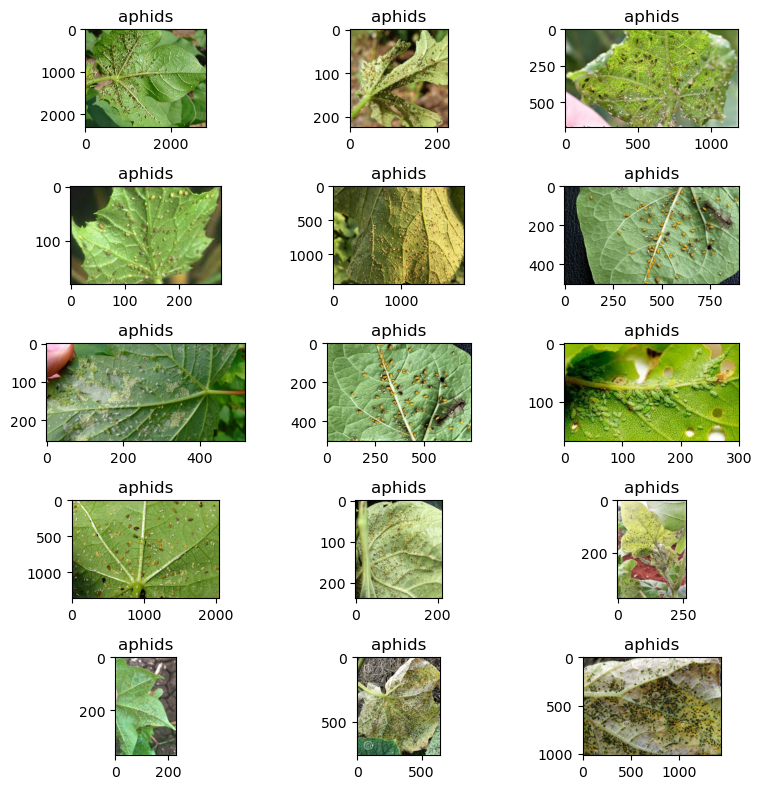

In [8]:
plt.figure(figsize=(8,8))
for i in  range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

### shuffle the images

In [9]:
images,labels=shuffle(images,labels)

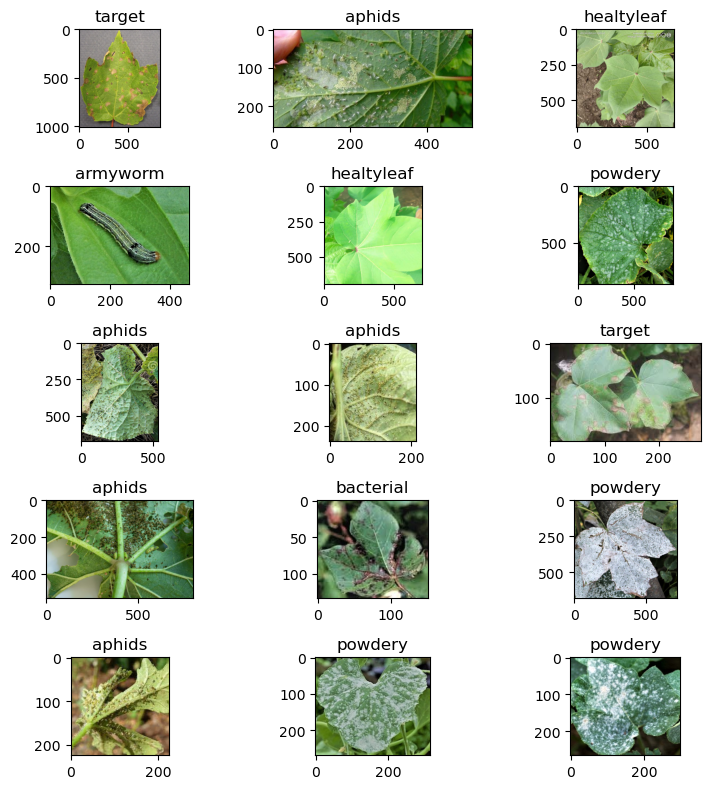

In [10]:
plt.figure(figsize=(8,8))
for i in  range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(images[i])
    plt.title(classes[labels[i]])
plt.tight_layout()


### Resize the images to EfficientNetV2

In [11]:
X=[]
for i in images:
    X.append(resize(i,(224,224,3)))

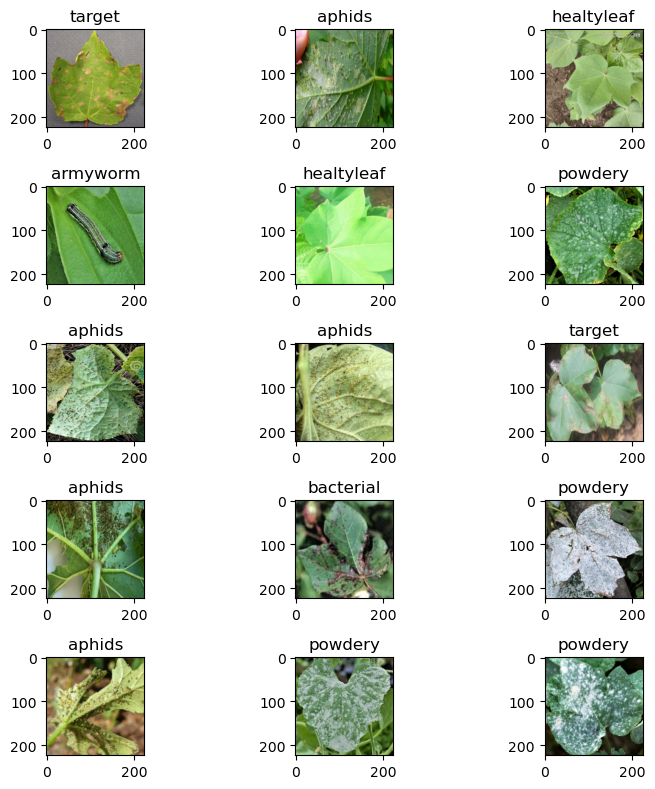

In [12]:
plt.figure(figsize=(8,8))
for i in  range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(X[i])
    plt.title(classes[labels[i]])
plt.tight_layout()

### Convert image and label datatypes from list to Numpy array

In [13]:
X=np.array(X)
y=np.array(labels)

### train test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y , train_size=0.25 , random_state=100)

### Load Pre-trained MobileNetV2 Feature Extractor Model

In [15]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [16]:
vgg16_base.trainable = False

### Define Number of Output Classes

In [17]:
num_of_classes = 6

### Build Transfer Learning Model using MobileNetV2 Feature Extractor

In [18]:
model = models.Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(14, activation='relu'),
    layers.Dense(num_of_classes, activation='softmax')
])

### Compile Transfer Learning Model

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

### Train the model

In [20]:
model.fit(X_train,y_train, epochs = 10, validation_split = 0.05)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.2080 - loss: 2.2477 - val_accuracy: 0.3333 - val_loss: 1.7561
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1837 - loss: 2.0708 - val_accuracy: 0.3333 - val_loss: 1.7236
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2998 - loss: 1.7847 - val_accuracy: 0.3333 - val_loss: 1.7771
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3015 - loss: 1.5363 - val_accuracy: 0.3333 - val_loss: 2.6978
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4506 - loss: 1.5746 - val_accuracy: 0.3333 - val_loss: 2.4242
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5044 - loss: 1.1745 - val_accuracy: 0.3333 - val_loss: 1.9060
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6188 - loss: 1.0942 - val_accuracy: 0.3333 - val_loss: 1.6294
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6117 - loss: 0.9874 - val_accuracy: 0.3333 - val_loss: 2.0647
Epoch 9/10
2/2 ━

### Model Prediction on Test Data

In [21]:
y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step


In [22]:
y_pred = [np.argmax(i) for i in y_pred]

### Calculate Accuracy Score


In [23]:
accuracy_score(y_test,y_pred)

0.4375

### Plot confusion matrix on heatmap

<Axes: >

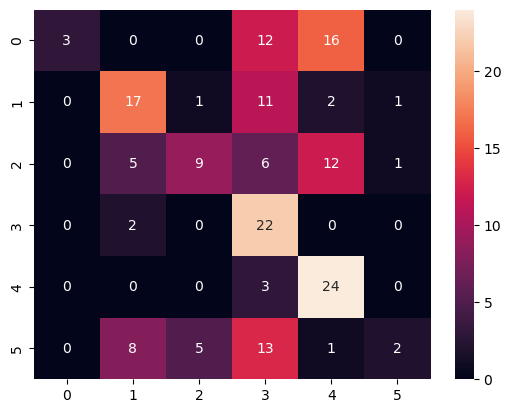

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

### Print classification report

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.10      0.18        31
           1       0.53      0.53      0.53        32
           2       0.60      0.27      0.37        33
           3       0.33      0.92      0.48        24
           4       0.44      0.89      0.59        27
           5       0.50      0.07      0.12        29

    accuracy                           0.44       176
   macro avg       0.57      0.46      0.38       176
weighted avg       0.58      0.44      0.37       176

